### Agência Nacional do Cinema - ANCINE

#### Desafios e Oportunidades na Indústria Cinematográfica Brasileira: Uma Análise de Ciência de Dados

---

Título do Notebook

---

Abrindo Projeto

In [80]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sea
from matplotlib import pyplot as plt
from abrir_projeto import Projeto
pj = Projeto()
pj.abrir_projeto()


***Bem vindo(a) ao Projeto!***

Para ler documentação: "pj.doc.documentacao"



In [81]:
pj.doc.documentacao()

**** DOCUMENTAÇÃO DO PROJETO ****
***Agência Nacional do Cinema***

Cada Arquivo CSV contém uma variável raíz e um 
número de referência para variáveis específicas.
*
*
Para chamar variável no Jupyter Notebook digite: "df." + variável
*
Para chamar variável específica digite: "df." + "variável_especifica" + número
*
*
Nome arquivo CSV | Nome variável raíz | Número variável específica
-
Agentes Econômicos Regulares = agnts_economicos = 1  
Atividades Economicas dos Agentes Regulares = atividade_economicas_agnts = 2 
Projetos Renúncia Fiscal = proj_renuncia_fiscal = 3  
Obras não Publicitárias Brasileiras - Fomento Indireto = obras_n_publi_fomento_direto =  4 
Obras não Publcitárias Brasileiras - Investimento FSA = obras_n_publi_investimento_fsa =  5 
Processos de Prestação de contas = processos_prestacao_contas = 6  
Investidores de projetos de Renúncia Fiscal = investidores_proj_renuncia_fiscal = 7   
Produtoras Independentes = produtoras_independentes = 8 
Produtores de obra não Publi

In [82]:
#Carregar variáveis no ambiente local (Método para economizar tempo de digitação)
def carregar():
        
        from pandas import DataFrame as pd

        global agnts_economicos
        agnts_economicos = pd(pj.df.agnts_economicos)
        global atividade_economicas_agnts
        atividade_economicas_agnts = pd(pj.df.atividade_economicas_agnts)
        global proj_renuncia_fiscal
        proj_renuncia_fiscal = pd(pj.df.proj_renuncia_fiscal)
        global obras_n_publi_fomento_direto
        obras_n_publi_fomento_direto = pd(pj.df.obras_n_publi_fomento_direto)
        global obras_n_publi_investimento_fsa
        obras_n_publi_investimento_fsa = pd(pj.df.obras_n_publi_investimento_fsa)
        global processos_prestacao_contas
        processos_prestacao_contas = pd(pj.df.processos_prestacao_contas)
        global investidores_proj_renuncia_fiscal
        investidores_proj_renuncia_fiscal = pd(pj.df.investidores_proj_renuncia_fiscal)
        global produtoras_independentes
        produtoras_independentes = pd(pj.df.produtoras_independentes)
        global produtores_obras_n_publi
        produtores_obras_n_publi = pd(pj.df.produtores_obras_n_publi)
        global proj_fsa_desembolso
        proj_fsa_desembolso = pd(pj.df.proj_fsa_desembolso)
        global relacao_grupos_economicos
        relacao_grupos_economicos = pd(pj.df.relacao_grupos_economicos)
        global salas_complexos
        salas_complexos = pd(pj.df.salas_complexos)    
carregar()

---


**Qual é a distribuição geográfica das produções cinematográficas no Brasil? Há concentração em determinadas regiões?**  

**Qual é o perfil dos investidores na indústria cinematográfica brasileira? Há diferenças significativas entre investidores de produções de grande escala e produções independentes?**  

Natureza Jurídica dos Agentes Econômicos

O que é agente econômico?

Qualquer pessoa natural ou jurídica que participa, independentemente, como sujeito ativo na atividade econômica (audiovisual ou não).

In [83]:
#Natureza Jurídica dos Agentes Econômicos

#Criando Dataframe merged Agentes Economicos Regulares x Atividades Economicas dos Agentes
agnts_atividades_economicas = pd.merge(agnts_economicos, atividade_economicas_agnts, on='REGISTRO_ANCINE', how='inner')
agnts_atividades_economicas = agnts_atividades_economicas[['REGISTRO_ANCINE', 'DATA_REGISTRO', 'RAZAO_SOCIAL_x', 'CNPJ_x',
       'DATA_CONSTITUICAO', 'UF', 'MUNICIPIO',
       'CLASSIFICACAO_AGENTE_ECONOMICO', 'NATUREZA_JURIDICA', 'ATIVIDADE_ECONOMICA','CLASSIFICACAO_ATIVIDADE', 'BRASILEIRO_INDEPENDENTE']]

agnts_atividades_economicas.rename(columns={'RAZAO_SOCIAL_x' : 'RAZAO_SOCIAL', 'CNPJ_x' : 'CNPJ'}, inplace=True)

consultas = {
    'ltda': agnts_economicos.query("NATUREZA_JURIDICA == 'Sociedade Empresária Limitada'"),
    'mei': agnts_economicos.query("NATUREZA_JURIDICA == 'Empresário (Individual)'"),
    'eireli_empresaria': agnts_economicos.query("NATUREZA_JURIDICA == 'Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)'"),
    'ss_limitada': agnts_economicos.query("NATUREZA_JURIDICA == 'Sociedade Simples Limitada'"),
    'associacao_privada': agnts_economicos.query("NATUREZA_JURIDICA == 'Associação Privada'"),
    'eireli_simples': agnts_economicos.query("NATUREZA_JURIDICA == 'Empresa Individual de Responsabilidade Limitada (de Natureza Simples)'"),
    'sa_fechada': agnts_economicos.query("NATUREZA_JURIDICA == 'Sociedade Anônima Fechada'")
}

globals().update(consultas)


**Qual a distribuição geográfico dos agentes econômicos no Brasil**

**Quais são os principais agentes econômicos atuantes na indústria cinematográfica brasileira?**  

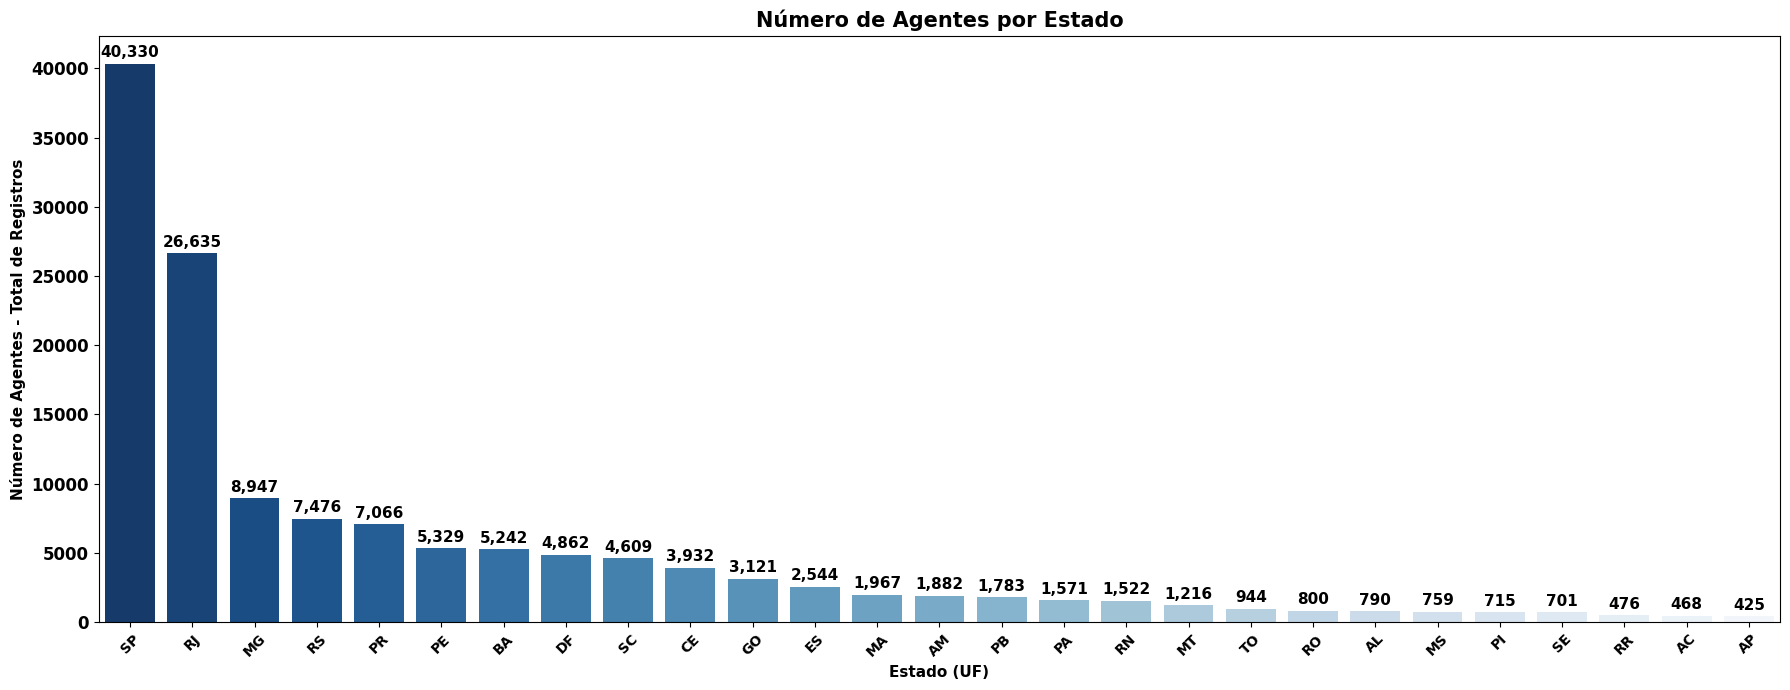

In [84]:
#Barplot com Número de Agentes por Estado
plt.figure(figsize=(18, 7))
ax = sea.countplot(data=agnts_atividades_economicas, x='UF', order=agnts_atividades_economicas['UF'].value_counts().index, palette='Blues_r')

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points',
                   fontsize=11, fontweight='bold')

plt.title('Número de Agentes por Estado', fontsize=15, fontweight='bold')
plt.xlabel('Estado (UF)', fontsize=11, fontweight='bold')
plt.ylabel('Número de Agentes - Total de Registros', fontsize=11, fontweight='bold')
plt.xticks(rotation=45, fontsize=10, fontweight='bold') 
plt.yticks(fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()



Observa-se uma concentração considerável de agentes econômicos nos estados de São Paulo (SP) e Rio de Janeiro (RJ) no setor audiovisual. Tal concentração é influenciada pela centralização das atividades de mercado e da disponibilidade de mão de obra qualificada nesses dois estados.


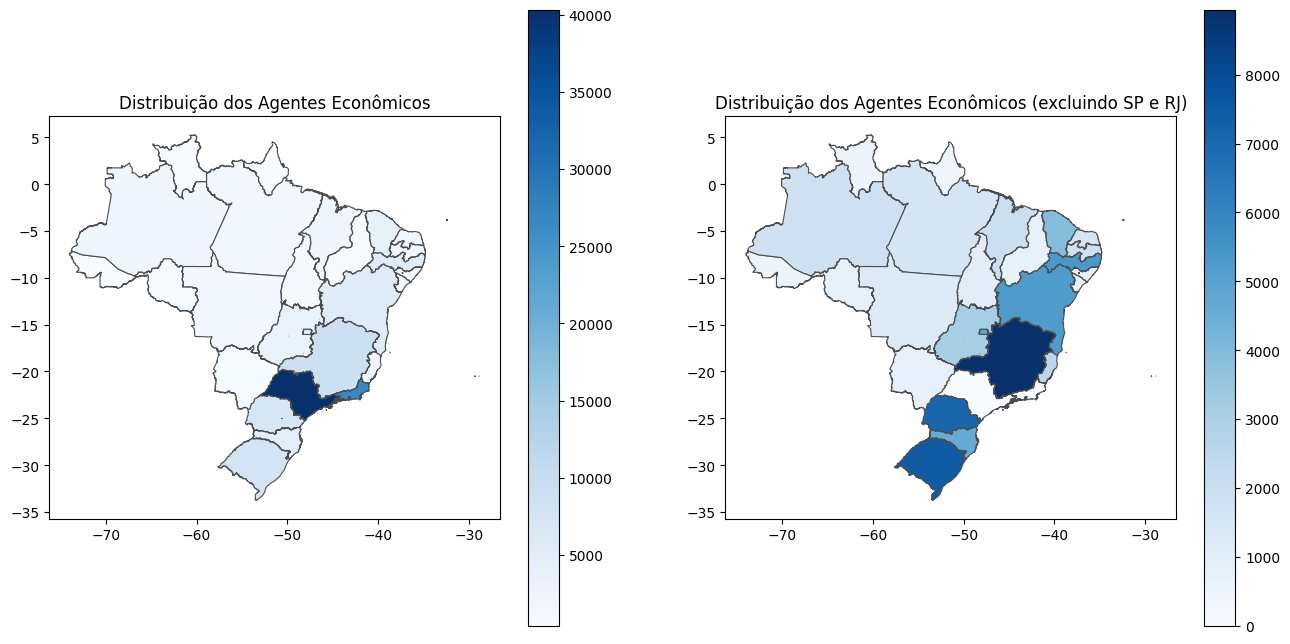

In [85]:
# Carregar mapa BR
brasil = gpd.read_file('C:\\Users\\syafo\\OneDrive\\Documentos\\GitHub\\AgenciaNacionalDoCinema_ANCINE\\mix\\BR_UF_2022.shp')

# Plot com todos os estados
totais_por_estado = agnts_atividades_economicas['UF'].value_counts().reset_index()
totais_por_estado.columns = ['UF', 'Total']

brasil = brasil.merge(totais_por_estado, left_on='SIGLA_UF', right_on='UF')

# Filtrar os dados excluindo SP e RJ
estados_sem_sp_rj = agnts_atividades_economicas[(agnts_atividades_economicas['UF'] != 'RJ') & (agnts_atividades_economicas['UF'] != 'SP')]
estados_count = estados_sem_sp_rj['UF'].value_counts().reset_index()
estados_count.columns = ['UF', 'Total']

# Adicionar linhas para SP e RJ com total zero
sp_row = pd.DataFrame({'UF': ['SP'], 'Total': [0]})
rj_row = pd.DataFrame({'UF': ['RJ'], 'Total': [0]})
estados_count = pd.concat([estados_count, sp_row, rj_row], ignore_index=True)

estados_count = estados_count.sort_values(by='UF')
estados_count = estados_count.rename(columns={'UF': 'UF_count', 'Total': 'Total_count'})
brasil = brasil.merge(estados_count, left_on='SIGLA_UF', right_on='UF_count')

# plotar
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# primeiro mapa
brasil.plot(column='Total', cmap='Blues', linewidth=0.8, ax=axs[0], edgecolor='0.3', legend=True)
axs[0].set_title('Distribuição dos Agentes Econômicos')
axs[0].set_xlabel(None)
axs[0].set_ylabel(None)

# segundo mapa
brasil.plot(column='Total_count', cmap='Blues', linewidth=0.8, ax=axs[1], edgecolor='0.3', legend=True)
axs[1].set_title('Distribuição dos Agentes Econômicos (excluindo SP e RJ)')
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)

plt.show()

Para melhor compreender a distribuição dos agentes econômicos, é necessário considerar a exclusão de SP e RJ da análise. Ao realizar essa exclusão, evidenciam-se padrões diferentes de distribuição, refletindo uma dispersão mais equitativa da atividade econômica pelo território nacional. Essa alteração na distribuição reflete as dinâmicas regionais específicas do setor audiovisual fora dos polos tradicionais, revelando potenciais áreas de crescimento e desenvolvimento em outras regiões do país.

Estuando mais o tema, vamos analisar o ranking de natureza juridica dos agentes econômicos

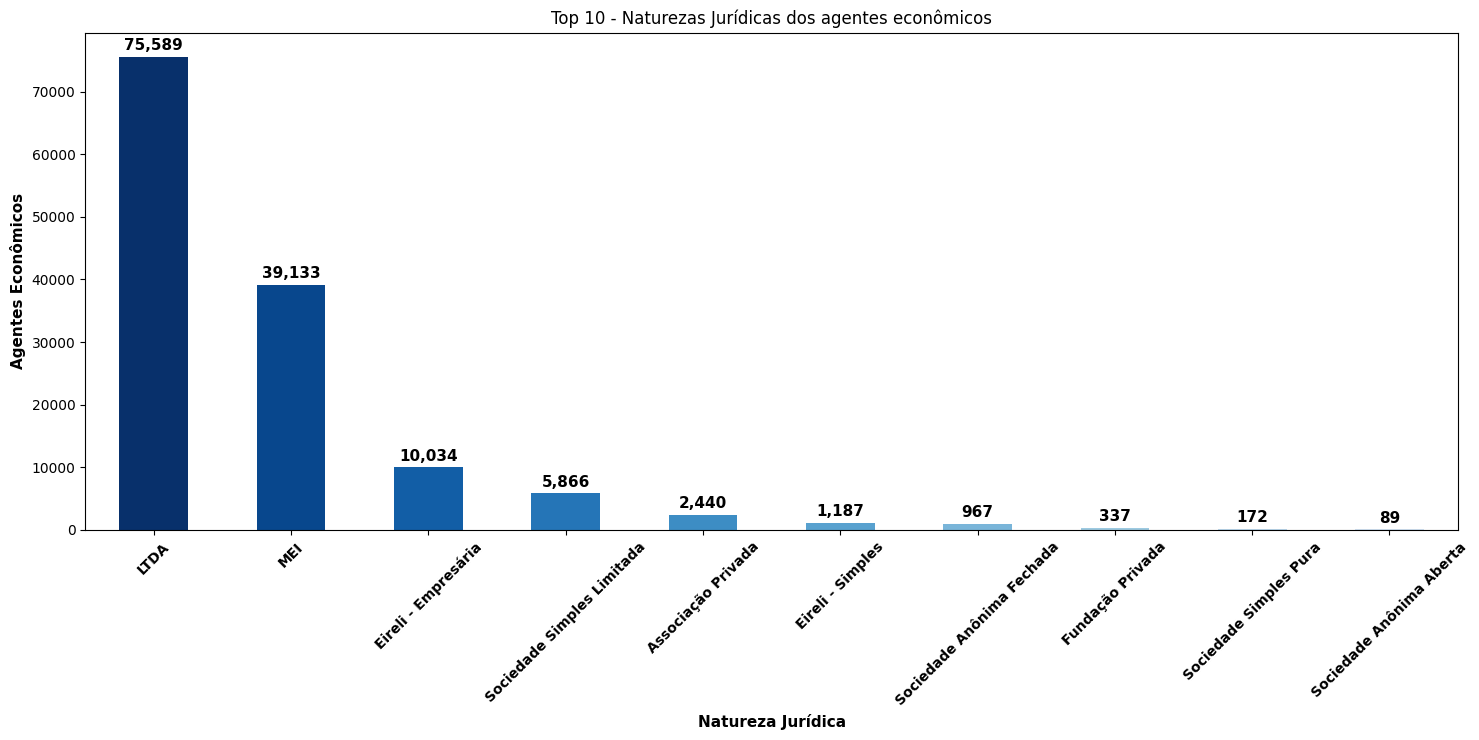

In [86]:
natureza_juridica = pd.DataFrame(agnts_atividades_economicas)
natureza_juridica['NATUREZA_JURIDICA'] = natureza_juridica['NATUREZA_JURIDICA'].replace({
    'Sociedade Empresária Limitada' : 'LTDA',
    'Empresário (Individual)': 'MEI',
    'Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)' : 'Eireli - Empresária',
    'Empresa Individual de Responsabilidade Limitada (de Natureza Simples)' : 'Eireli - Simples'
})
ranking_natureza_juridica_top_10 = natureza_juridica['NATUREZA_JURIDICA'].value_counts().head(10)
ranking_natureza_juridica_top_10

plt.figure(figsize=(15,7.5))
cores = plt.cm.Blues(np.linspace(1, 0.2, len(ranking_natureza_juridica_top_10)))
ax = ranking_natureza_juridica_top_10.plot(kind='bar', color=cores)

for n in ax.patches:
    ax.annotate(format(n.get_height(), ',.0f'), 
                    (n.get_x() + n.get_width() / 2., n.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 8), 
                    textcoords = 'offset points',
                    fontsize=11, fontweight='bold')

plt.title('Top 10 - Naturezas Jurídicas dos agentes econômicos')
plt.xlabel('Natureza Jurídica', fontsize=11, fontweight='bold')
plt.ylabel('Agentes Econômicos', fontsize=11, fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.tight_layout()
plt.show()


a diferença na mancha do mapa entre as Naturezas Jurídicas

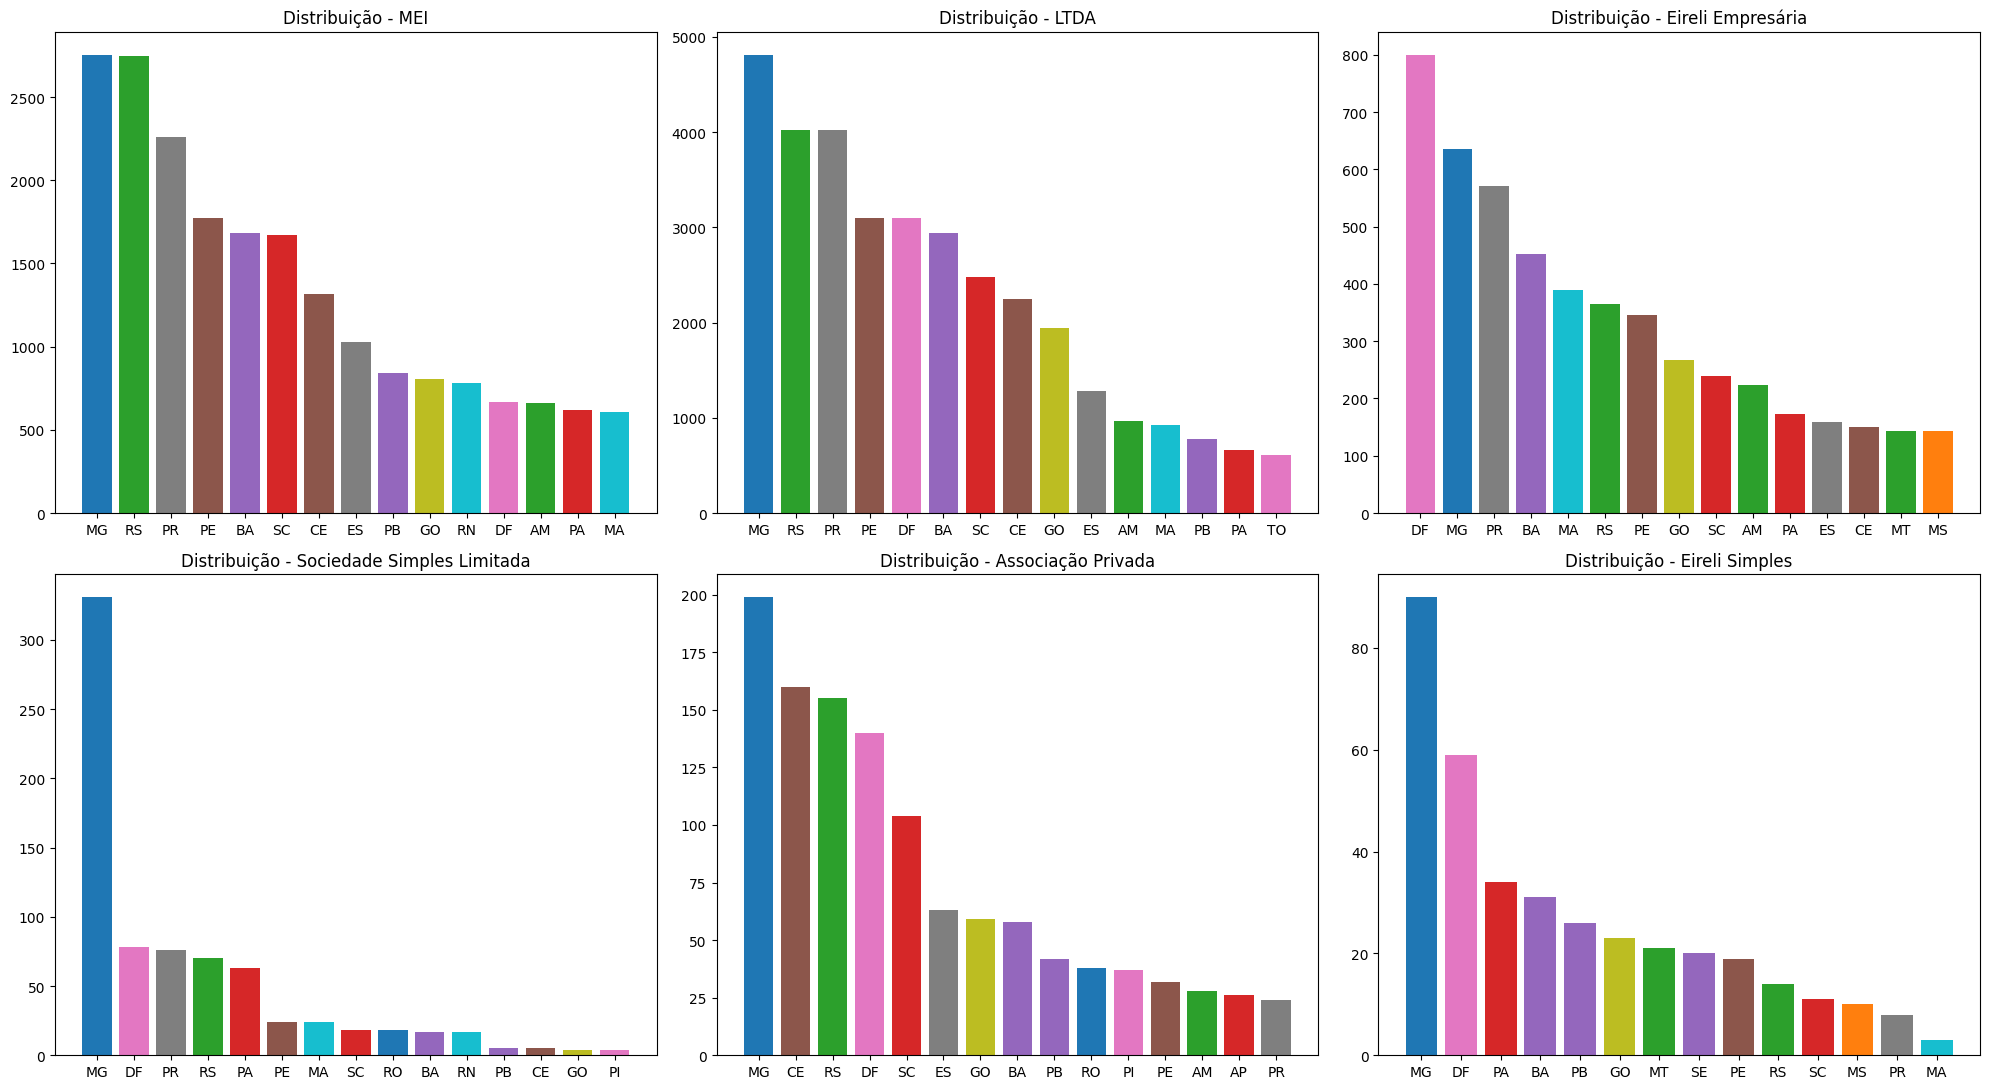

In [111]:

def barplot_natureza_juridica():

    global agnts_atividades_economicas

    # Calcular totais - MEI
    data_sem_sp_rj = agnts_atividades_economicas[(agnts_atividades_economicas['UF'] != 'SP') & (agnts_atividades_economicas['UF'] != 'RJ')]
    
    #MEI
    mei = data_sem_sp_rj[data_sem_sp_rj['NATUREZA_JURIDICA'] == 'Empresário (Individual)']
    mei_totais = mei['UF'].value_counts().reset_index().head(15)
    mei_totais.columns = ['UF', 'Total_MEI']

    #LTDA
    ltda = data_sem_sp_rj[data_sem_sp_rj['NATUREZA_JURIDICA'] == 'Sociedade Empresária Limitada']
    ltda_totais = ltda['UF'].value_counts().reset_index().head(15)
    ltda_totais.columns = ['UF', 'Total_LTDA']

    #Eireli Empresária
    eireli_empresaria = data_sem_sp_rj[data_sem_sp_rj['NATUREZA_JURIDICA'] == 'Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)']
    eireli_empresaria_totais = eireli_empresaria['UF'].value_counts().reset_index().head(15)
    eireli_empresaria_totais.columns = ['UF', 'Total_Eireli_Empresaria']

    #Sociedade Simples Limitada
    ss_limitada = data_sem_sp_rj[data_sem_sp_rj['NATUREZA_JURIDICA'] == 'Sociedade Simples Limitada']
    ss_limitada_totais = ss_limitada['UF'].value_counts().reset_index().head(15)
    ss_limitada_totais.columns = ['UF', 'Total_SS_limitada']

    #Associação Privada
    associacao_privada = data_sem_sp_rj[data_sem_sp_rj['NATUREZA_JURIDICA'] == 'Associação Privada']
    associacao_privada_totais = associacao_privada['UF'].value_counts().reset_index().head(15)
    associacao_privada_totais.columns = ['UF', 'Total_Associacao_Privada']

    #Eireli Empresária
    eireli_simples = data_sem_sp_rj[data_sem_sp_rj['NATUREZA_JURIDICA'] == 'Empresa Individual de Responsabilidade Limitada (de Natureza Simples)']
    eireli_simples_totais = eireli_simples['UF'].value_counts().reset_index().head(15)
    eireli_simples_totais.columns = ['UF', 'Total_Eireli_Simples']


    cores_por_uf = {
    'AC': '#1f77b4',  # Azul
    'AL': '#ff7f0e',  # Laranja
    'AM': '#2ca02c',  # Verde
    'AP': '#d62728',  # Vermelho
    'BA': '#9467bd',  # Roxo
    'CE': '#8c564b',  # Marrom
    'DF': '#e377c2',  # Rosa
    'ES': '#7f7f7f',  # Cinza
    'GO': '#bcbd22',  # Amarelo
    'MA': '#17becf',  # Azul claro
    'MG': '#1f77b4',  # Azul
    'MS': '#ff7f0e',  # Laranja
    'MT': '#2ca02c',  # Verde
    'PA': '#d62728',  # Vermelho
    'PB': '#9467bd',  # Roxo
    'PE': '#8c564b',  # Marrom
    'PI': '#e377c2',  # Rosa
    'PR': '#7f7f7f',  # Cinza
    'RJ': '#bcbd22',  # Amarelo
    'RN': '#17becf',  # Azul claro
    'RO': '#1f77b4',  # Azul
    'RR': '#ff7f0e',  # Laranja
    'RS': '#2ca02c',  # Verde
    'SC': '#d62728',  # Vermelho
    'SE': '#9467bd',  # Roxo
    'SP': '#8c564b',  # Marrom
    'TO': '#e377c2'   # Rosa
}


    #PLOT
    # Plotar mapas lado a lado
    fig, axs = plt.subplots(2, 3, figsize=(20, 11))

    # Primeiro mapa - MEI
    axs[0, 0].bar(x=mei_totais['UF'], height=mei_totais['Total_MEI'], color=[cores_por_uf.get(uf, 'gray') for uf in mei_totais['UF']])
    axs[0, 0].set_title('Distribuição - MEI')
    axs[0, 0].set_xlabel(None)
    axs[0, 0].set_ylabel(None)

    # Segundo mapa - LTDA
    axs[0, 1].bar(x=ltda_totais['UF'], height=ltda_totais['Total_LTDA'], color=[cores_por_uf.get(uf, 'gray') for uf in ltda_totais['UF']])
    axs[0, 1].set_title('Distribuição - LTDA')
    axs[0, 1].set_xlabel(None)
    axs[0, 1].set_ylabel(None)

    # Terceiro mapa - Eireli Empresária
    axs[0, 2].bar(x=eireli_empresaria_totais['UF'], height=eireli_empresaria_totais['Total_Eireli_Empresaria'], color=[cores_por_uf.get(uf, 'gray') for uf in eireli_empresaria_totais['UF']])
    axs[0, 2].set_title('Distribuição - Eireli Empresária')
    axs[0, 2].set_xlabel(None)
    axs[0, 2].set_ylabel(None)

    # Quarto mapa - Sociedade Simples Limitada
    axs[1, 0].bar(x=ss_limitada_totais['UF'], height=ss_limitada_totais['Total_SS_limitada'], color=[cores_por_uf.get(uf, 'gray') for uf in ss_limitada_totais['UF']])
    axs[1, 0].set_title('Distribuição - Sociedade Simples Limitada')
    axs[1, 0].set_xlabel(None)
    axs[1, 0].set_ylabel(None)

    # Quinto mapa - Associação Privada
    axs[1, 1].bar(x=associacao_privada_totais['UF'], height=associacao_privada_totais['Total_Associacao_Privada'], color=[cores_por_uf.get(uf, 'gray') for uf in associacao_privada_totais['UF']])
    axs[1, 1].set_title('Distribuição - Associação Privada')
    axs[1, 1].set_xlabel(None)
    axs[1, 1].set_ylabel(None)

    # Sexto mapa - Eireli Simples
    axs[1, 2].bar(x=eireli_simples_totais['UF'], height=eireli_simples_totais['Total_Eireli_Simples'], color=[cores_por_uf.get(uf, 'gray') for uf in eireli_simples_totais['UF']])
    axs[1, 2].set_title('Distribuição - Eireli Simples')
    axs[1, 2].set_xlabel(None)
    axs[1, 2].set_ylabel(None)

    plt.tight_layout()
    plt.show()
barplot_natureza_juridica()

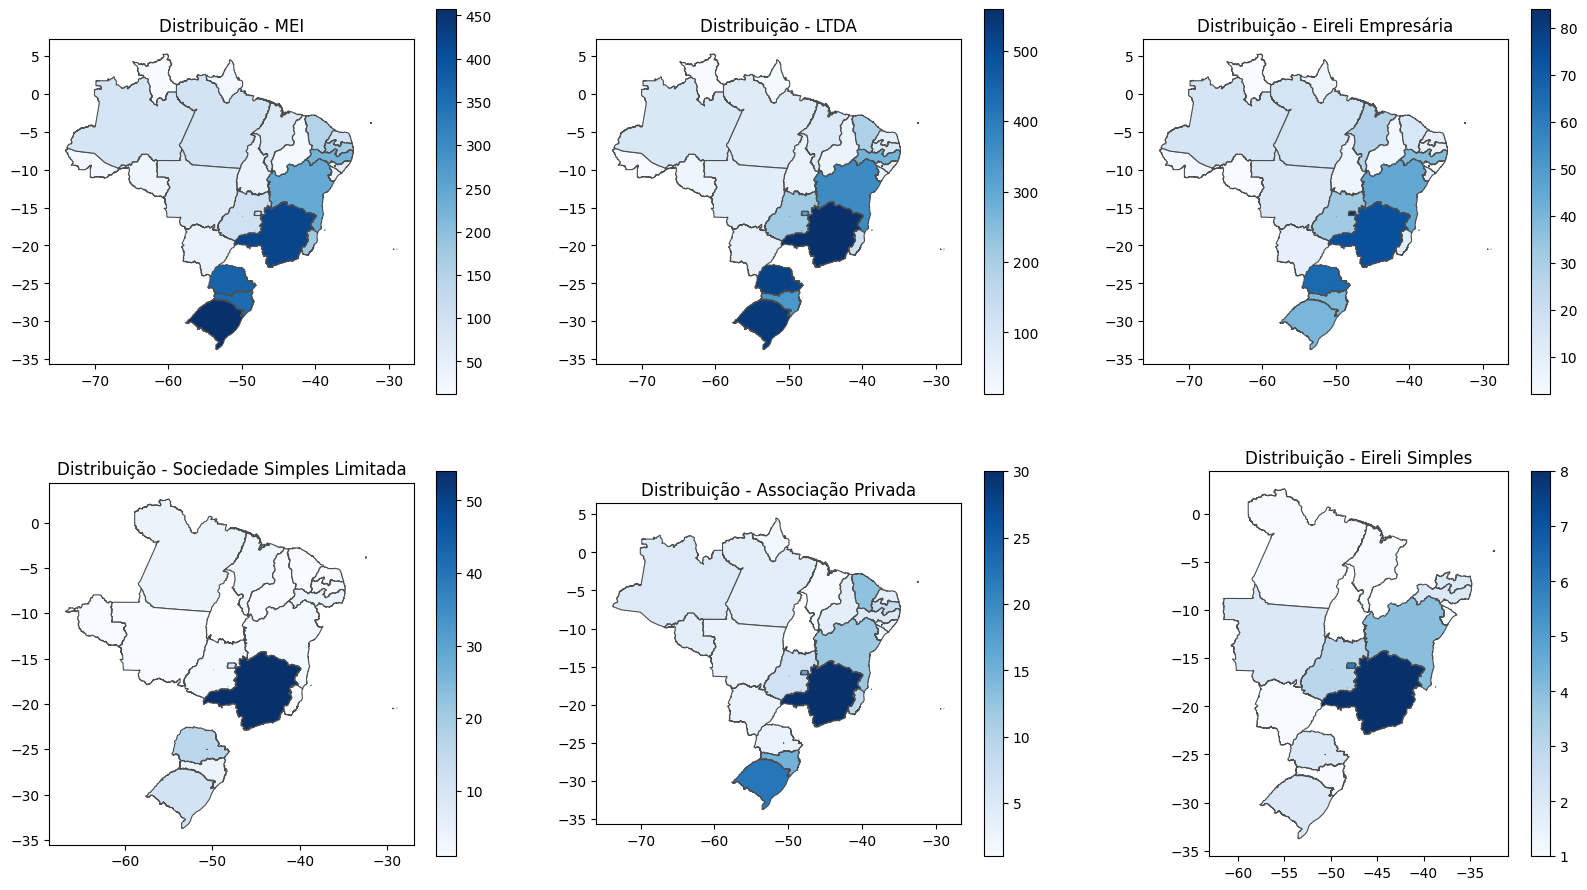

In [ ]:
# brasil_pre_2 = gpd.read_file('C:\\Users\\syafo\\OneDrive\\Documentos\\GitHub\\AgenciaNacionalDoCinema_ANCINE\\mix\\BR_UF_2022.shp')
# brasil_2 = brasil_pre_2[(brasil_pre_2['SIGLA_UF'] != 'SP') & (brasil_pre_2['SIGLA_UF'] != 'RJ')]
# # Calcular totais - MEI
# mei_totais = mei['UF'].value_counts().reset_index()
# mei_totais.columns = ['UF', 'Total_MEI']
# brasil_2_mei = brasil_2.merge(mei_totais, left_on='SIGLA_UF', right_on='UF')

# # Calcular totais - LTDA
# ltda_totais = ltda['UF'].value_counts().reset_index()
# ltda_totais.columns = ['UF', 'Total_LTDA']
# brasil_2_ltda = brasil_2.merge(ltda_totais, left_on='SIGLA_UF', right_on='UF')

# #Calcular totais - Eireli Simples
# eireli_simples_totais = eireli_simples['UF'].value_counts().reset_index()
# eireli_simples_totais.columns = ['UF', 'Total_Eireli_Simples']
# brasil_2_eireli_simples = brasil_2.merge(eireli_simples_totais, left_on='SIGLA_UF', right_on='UF')

# #Calcular totais - Eireli Empresária
# eireli_empresaria_totais = eireli_empresaria['UF'].value_counts().reset_index()
# eireli_empresaria_totais.columns = ['UF', 'Total_Eireli_Empresaria']
# brasil_2_eireli_empresaria = brasil_2.merge(eireli_empresaria_totais, left_on='SIGLA_UF', right_on='UF')

# #Calcular totais - Sociedade Simples Limitada
# ss_limitada_totais = ss_limitada['UF'].value_counts().reset_index()
# ss_limitada_totais.columns = ['UF', 'Total_SS_limitada']
# brasil_2_ss_limitada = brasil_2.merge(ss_limitada_totais, left_on='SIGLA_UF', right_on='UF')

# #Calcular totais - Associação Privada
# associacao_privada_totais = associacao_privada['UF'].value_counts().reset_index()
# associacao_privada_totais.columns = ['UF', 'Total_Associacao_Privada']
# brasil_2_associacao_privada = brasil_2.merge(associacao_privada_totais, left_on='SIGLA_UF', right_on='UF')

# #PLOT
# # Plotar mapas lado a lado
# fig, axs = plt.subplots(2, 3, figsize=(20, 11))

# # Primeiro mapa - MEI
# brasil_2_mei.plot(column='Total_MEI', cmap='Blues', linewidth=0.8, ax=axs[0][0], edgecolor='0.3', legend=True)
# axs[0][0].set_title('Distribuição - MEI')
# axs[0][0].set_xlabel(None)
# axs[0][0].set_ylabel(None)

# # Segundo mapa - LTDA
# brasil_2_ltda.plot(column='Total_LTDA', cmap='Blues', linewidth=0.8, ax=axs[0][1], edgecolor='0.3', legend=True)
# axs[0][1].set_title('Distribuição - LTDA')
# axs[0][1].set_xlabel(None)
# axs[0][1].set_ylabel(None)

# # Terceiro mapa - Eireli Empresária
# brasil_2_eireli_empresaria.plot(column='Total_Eireli_Empresaria', cmap='Blues', linewidth=0.8, ax=axs[0][2], edgecolor='0.3', legend=True)
# axs[0][2].set_title('Distribuição - Eireli Empresária')
# axs[0][2].set_xlabel(None)
# axs[0][2].set_ylabel(None)

# # Quarto mapa - Sociedade Simples Limitada
# brasil_2_ss_limitada.plot(column='Total_SS_limitada', cmap='Blues', linewidth=0.8, ax=axs[1][0], edgecolor='0.3', legend=True)
# axs[1][0].set_title('Distribuição - Sociedade Simples Limitada')
# axs[1][0].set_xlabel(None)
# axs[1][0].set_ylabel(None)

# # Quinto mapa - Associação Privada
# brasil_2_associacao_privada.plot(column='Total_Associacao_Privada', cmap='Blues', linewidth=0.8, ax=axs[1][1], edgecolor='0.3', legend=True)
# axs[1][1].set_title('Distribuição - Associação Privada')
# axs[1][1].set_xlabel(None)
# axs[1][1].set_ylabel(None)

# # Sexto mapa - Eireli Simples
# brasil_2_eireli_simples.plot(column='Total_Eireli_Simples', cmap='Blues', linewidth=0.8, ax=axs[1][2], edgecolor='0.3', legend=True)
# axs[1][2].set_title('Distribuição - Eireli Simples')
# axs[1][2].set_xlabel(None)
# axs[1][2].set_ylabel(None)


# plt.show()


---

Mapa das produtoras independentes por pontuação

In [118]:
produtoras_independentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11354 entries, 0 to 11353
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   RAZAO_SOCIAL                   11354 non-null  object
 1   REGISTRO_ANCINE                11354 non-null  int64 
 2   CNPJ                           11354 non-null  object
 3   UF                             11354 non-null  object
 4   CLASSIFICACAO_NIVEL_PRODUTORA  11354 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 443.6+ KB


In [119]:
agnts_atividades_economicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136112 entries, 0 to 136111
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   REGISTRO_ANCINE                 136112 non-null  int64         
 1   DATA_REGISTRO                   136112 non-null  datetime64[ns]
 2   RAZAO_SOCIAL                    136112 non-null  object        
 3   CNPJ                            136112 non-null  object        
 4   DATA_CONSTITUICAO               136112 non-null  datetime64[ns]
 5   UF                              136112 non-null  object        
 6   MUNICIPIO                       136112 non-null  object        
 7   CLASSIFICACAO_AGENTE_ECONOMICO  136112 non-null  object        
 8   NATUREZA_JURIDICA               136112 non-null  object        
 9   ATIVIDADE_ECONOMICA             136112 non-null  object        
 10  CLASSIFICACAO_ATIVIDADE         136112 non-null  int64  

In [120]:
produtora_classificacao = pd.merge(produtoras_independentes, agnts_atividades_economicas, on='REGISTRO_ANCINE')
produtora_classificacao.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95054 entries, 0 to 95053
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   RAZAO_SOCIAL_x                  95054 non-null  object        
 1   REGISTRO_ANCINE                 95054 non-null  int64         
 2   CNPJ_x                          95054 non-null  object        
 3   UF_x                            95054 non-null  object        
 4   CLASSIFICACAO_NIVEL_PRODUTORA   95054 non-null  int64         
 5   DATA_REGISTRO                   95054 non-null  datetime64[ns]
 6   RAZAO_SOCIAL_y                  95054 non-null  object        
 7   CNPJ_y                          95054 non-null  object        
 8   DATA_CONSTITUICAO               95054 non-null  datetime64[ns]
 9   UF_y                            95054 non-null  object        
 10  MUNICIPIO                       95054 non-null  object        
 11  CL

<Axes: xlabel='CLASSIFICACAO_NIVEL_PRODUTORA', ylabel='UF'>

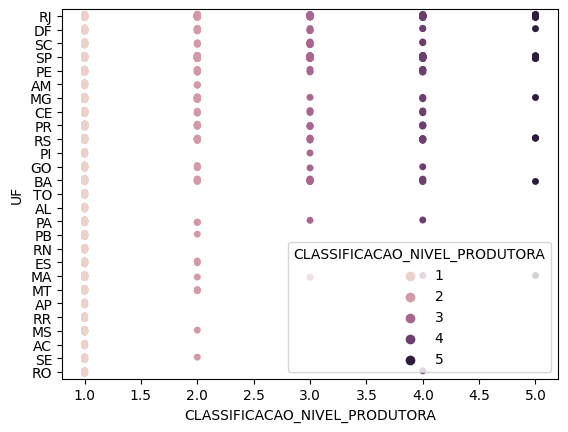

In [114]:

sea.stripplot(x='CLASSIFICACAO_NIVEL_PRODUTORA', y='UF', data=produtoras_independentes, hue='CLASSIFICACAO_NIVEL_PRODUTORA')